In [67]:
import pandas as pd 
import numpy as np
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

PermissionError: [Errno 13] Permission denied: 'Telco_customer_churn.xlsx'

In [ ]:
print("Shape of the dataset:\n", df.shape)

print("Columns in the dataset:\n", df.columns)

print("Header of the dataset:\n", df.head())

print("Data set info:\n", df.info())

Shape of the dataset:
 (7043, 33)
Columns in the dataset:
 Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='str')
Header of the dataset:
    CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los An

In [ ]:
df["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
df.dtypes

CustomerID               str
Count                  int64
Country                  str
State                    str
City                     str
Zip Code               int64
Lat Long                 str
Latitude             float64
Longitude            float64
Gender                   str
Senior Citizen           str
Partner                  str
Dependents               str
Tenure Months          int64
Phone Service            str
Multiple Lines           str
Internet Service         str
Online Security          str
Online Backup            str
Device Protection        str
Tech Support             str
Streaming TV             str
Streaming Movies         str
Contract                 str
Paperless Billing        str
Payment Method           str
Monthly Charges      float64
Total Charges         object
Churn Label              str
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason             str
dtype: object

In [ ]:

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

missing_totalcharges = df['Total Charges'].isnull().sum()
print("Missing Total Charges:", missing_totalcharges)

df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


Missing Total Charges: 11


C:\Users\saad8\AppData\Local\Temp\ipykernel_1972\393430696.py:6: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [68]:
df["Churn Value"].unique()

array([1, 0])

In [ ]:
y = df["Churn Value"]

x =df.drop(columns=[
    'CustomerID', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Value', 'Churn Score',
    'Churn Reason', 'CLTV'
])

print("Features shape:", x.shape)
print("Target shape:", y.shape)

Features shape: (7043, 20)
Target shape: (7043,)


In [73]:
x.shape
x.columns
y.value_counts()

print("Features shape:", x.shape)
print("Target shape:", y.shape)

Features shape: (7043, 20)
Target shape: (7043,)


In [ ]:
cat_features = x.select_dtypes(include=['object']).columns
cat_features




C:\Users\saad8\AppData\Local\Temp\ipykernel_1972\2743172313.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = x.select_dtypes(include=['object']).columns


Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [77]:
x.isnull().sum().sort_values(ascending=False)


Total Charges        11
Count                 0
Senior Citizen        0
Gender                0
Partner               0
Dependents            0
Phone Service         0
Tenure Months         0
Internet Service      0
Online Security       0
Online Backup         0
Multiple Lines        0
Device Protection     0
Tech Support          0
Streaming Movies      0
Streaming TV          0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
dtype: int64

In [78]:
y.value_counts(normalize=True)

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [79]:
y.value_counts()

y.value_counts(normalize=True)*100


Churn Value
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [80]:
x["Tenure Months"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

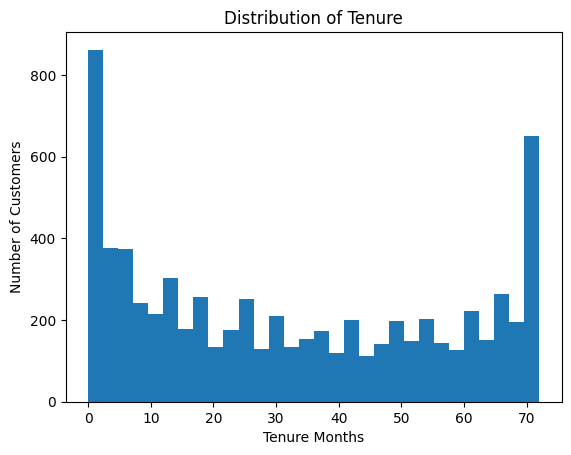

In [82]:
import matplotlib.pyplot as plt

plt.hist(x["Tenure Months"], bins=30)
plt.xlabel("Tenure Months")
plt.ylabel("Number of Customers")
plt.title("Distribution of Tenure")
plt.show()


In [ ]:
x["Monthly Charges"].describe()

plt.hist(x["Monthly Charges"], bins=30)
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Monthly Charges Distribution")
plt.show()


In [83]:
x['Contract'].value_counts()


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [85]:
x["Gender"].value_counts(normalize=True)*100

Gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

In [ ]:
pd.crosstab(
    x['Tenure Months']>12,
    y,
    normalize='index'
)

Churn Value,0,1
Tenure Months,,
False,0.525618,0.474382
True,0.828701,0.171299


In [87]:
pd.crosstab(
    x["Contract"],
    y,          
    normalize='index'
)

Churn Value,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [88]:
pd.crosstab(
    x["Payment Method"],
    y,
    normalize='index'
).sort_values(by=1, ascending=False)


Churn Value,0,1
Payment Method,,
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431


In [93]:
print(x.columns)


Index(['Count', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges'],
      dtype='str')


In [96]:
y = df["Churn Value"]
print(y.name)

Churn Value


In [97]:
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x.select_dtypes(include=['object']).columns

num_cols, cat_cols

C:\Users\saad8\AppData\Local\Temp\ipykernel_1972\2107104000.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = x.select_dtypes(include=['object']).columns


(Index(['Count', 'Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='str'),
 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
       dtype='str'))

In [98]:
x.isnull().sum().sort_values(ascending=False)

Total Charges        11
Count                 0
Senior Citizen        0
Gender                0
Partner               0
Dependents            0
Phone Service         0
Tenure Months         0
Internet Service      0
Online Security       0
Online Backup         0
Multiple Lines        0
Device Protection     0
Tech Support          0
Streaming Movies      0
Streaming TV          0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
dtype: int64

In [100]:
from sklearn.impute import SimpleImputer   
num_imputer = SimpleImputer(strategy="median")
x[num_cols] = num_imputer.fit_transform(x[num_cols]) 

In [102]:
cat_imputer = SimpleImputer(strategy="most_frequent")
x[cat_cols] = cat_imputer.fit_transform(x[cat_cols])

x = pd.get_dummies(x, drop_first=True)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [104]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y
)   